# <center> PhotoDoodle: Learning Artistic Image Editing from Few-Shot Pairwise Data</center>    

##  摘要  
### <p style="text-indent: 2em;line-height: 1.8;">“照片涂鸦（Photo Doodling）”是一种将装饰性元素（如风格化线条、装饰图案、语义对象）叠加到照片上的艺术创作形式，其核心挑战在于：  无缝融合：插入元素需与背景在透视、语义、视觉上保持一致；  背景保留：避免对原始背景的非预期修改（如颜色偏移、纹理失真）；风格高效捕捉：从少量（30-50对）“编辑前后”图像对中学习艺术家的独特风格。  现有方法（如全局风格迁移、基于掩码的修复）无法同时满足这些需求，因此提出PhotoDoodle框架，专门解决艺术化照片编辑的痛点。</p>


 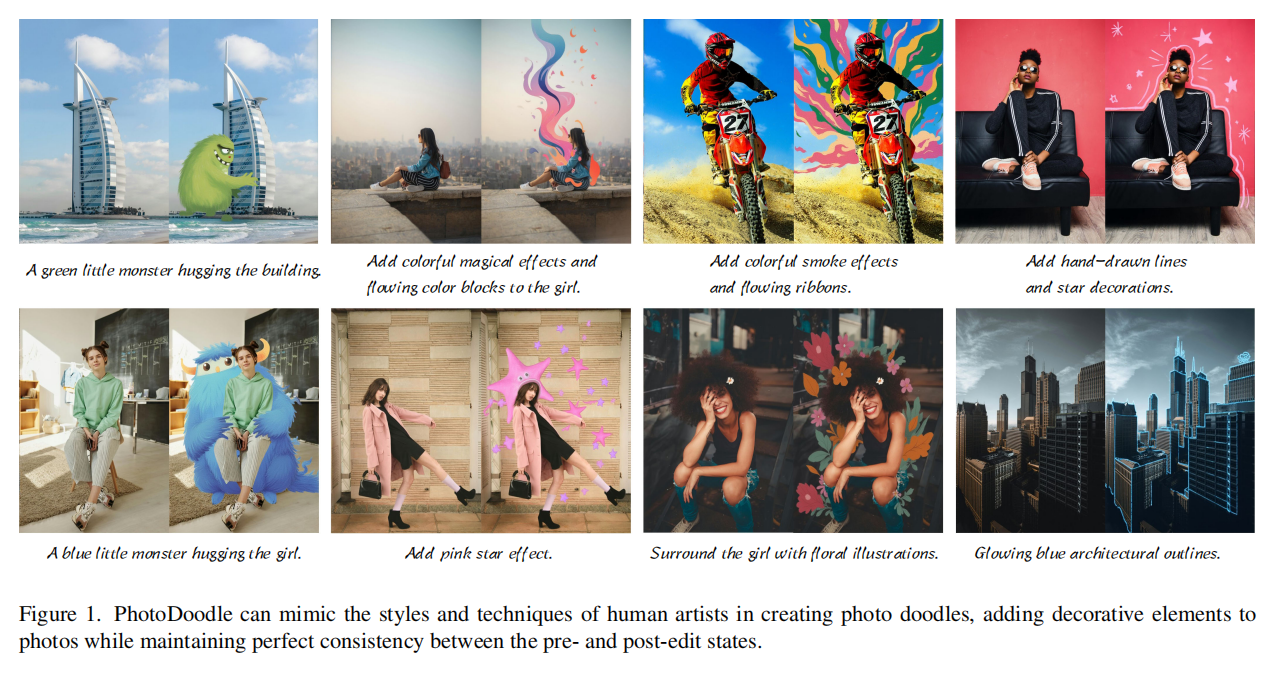

# 1.代码准备

我们已将代码下载，并放到 PhotoDoodle 文件夹下。

# 2.环境准备

我们已将运行本文件所需的环境安装好，并内置在了 /workspace/envs/doodle 文件夹下。您无需安装就可以运行下方代码块。

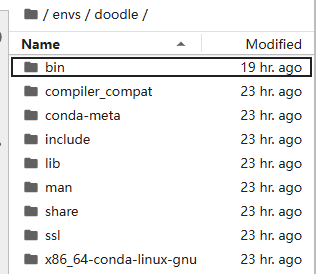

# 3. 推理

执行下方的命令以我们运行代码中自带的推理脚本。 1卡资源下本阶段耗时约：3~4分钟。
<br>这段 Python 代码是给猫咪图片添加光晕和翅膀特效。代码流程如下：
<br>    （1）导入必要的库：从 PhotoDoodle 项目中导入自定义的 FluxPipeline，以及 PyTorch 和 PIL 库
<br>    （2）加载基础模型：使用预训练的 FLUX.1-dev 模型
<br>    （3）加载 LoRA 权重：先加载基础 LoRA 权重，融合后卸载；再加载特定的魔法效果 LoRA 权重
<br>    （4）准备输入：读取本地图片作为条件图像，设置生成参数
<br>    （5）执行推理：基于输入图片和提示词，生成新图像
<br>    （6）保存结果：将生成的图像保存为 output.png
<br>    注意：如果您想体验其他图片，可以修改 PhotoDoodle/inference.py 中的参数。

In [2]:
%%script bash
# 初始化 conda
eval "$(conda shell.bash hook)"
# 激活目标环境
conda activate /workspace/envs/doodle

# 创建输出目录（如果不存在）
mkdir -p ./work_dirs/inference_result
# 创建日志目录（如果不存在）
mkdir -p ./work_dirs/logs

# 定义日志文件路径
LOG_FILE="./work_dirs/logs/inference_$(date +'%Y%m%d_%H%M%S').log"
# 运行训练脚本并保存过滤后的日志（不输出到屏幕）
{
    python inference.py 2>&1 | 
    grep --line-buffered -iv -e "warning" -e "futurewarning"
} > "$LOG_FILE"

# 4. 训练

## 4.1 从 huggingface 获取数据

我们已经将从huggingface获取的数据集放到 photodoodle/data 目录下。

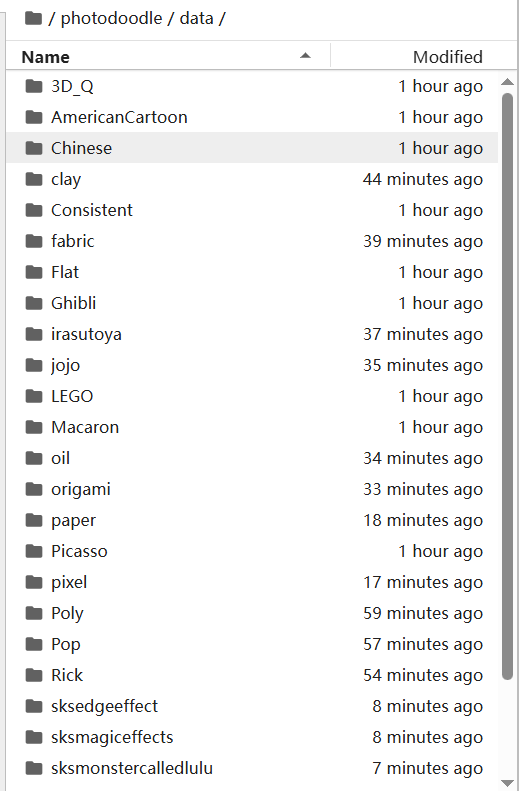

训练过程使用存储在 .jsonl 文件中的配对数据集，每个条目包含图像文件路径和相应的文本描述。每个条目包括源图像路径、目标（修改后）图像路径以及描述修改的标题。

示例格式：

{"source": "path/to/source.jpg", "target": "path/to/modified.jpg", "caption": "Instruction of modifications"}
{"source": "path/to/source2.jpg", "target": "path/to/modified2.jpg", "caption": "Another instruction"}


## 4.2 获取用于 edit-lora 训练的预训练模型

我们执行下方的命令以获取用于 edit-lora 训练的预训练模型。执行完成后，文件夹内新增一个 PhotoDoodle_Pretrain 文件夹。

融合了 LoRA 权重的完整模型保存到本地目录PhotoDoodle_Pretrain。

保存后的模型可以直接加载，您无需再次融合 LoRA 权重。

In [4]:
%%script bash
# 初始化 conda
eval "$(conda shell.bash hook)"
# 激活目标环境
conda activate /workspace/envs/doodle

# 创建输出目录（如果不存在）
mkdir -p ./work_dirs/merge_pretrain
# 创建日志目录（如果不存在）
mkdir -p ./work_dirs/logs

# 定义日志文件路径
LOG_FILE="./work_dirs/logs/merge_pretrain_$(date +'%Y%m%d_%H%M%S').log"
# 运行训练脚本并保存过滤后的日志（不输出到屏幕）
{
    python merge_pretrain.py 2>&1 | 
    grep --line-buffered -iv -e "warning" -e "futurewarning"
} > "$LOG_FILE"

## 4.3 开始训练

PhotoDoodle 模型在 Cartoon monster 数据集上训练，需要运行train_sksmonstercalledlulu.sh文件。
<br>下方为执行脚本：train_sksmonstercalledlulu.sh
<br>模型：使用【4.2获取用于 edit-lora 训练的预训练模型】 部分生成模型
<br>模型路径：photodoodle/model/PhotoDoodle_Pretrain/
<br>数据：sksmonstercalledlulu
<br>数据路径：photodoodle/data/PhotoDoodle/sksmonstercalledlulu/
<br>数据数量：47个
<br>每个epoch的批次数:Num batches each epoch = 47 , batch_size=1
<br>输出路径：work_dirs/sksmonstercalledlulu
<br>耗时： 1卡资源下本阶段耗时约：60~70分钟。

In [34]:
%%script bash
# 初始化 conda
eval "$(conda shell.bash hook)"
# 激活目标环境
conda activate /workspace/envs/doodle

# 创建输出目录（如果不存在）
mkdir -p ./work_dirs/train
# 创建日志目录（如果不存在）
mkdir -p ./work_dirs/logs
# 定义日志文件路径
LOG_FILE="./work_dirs/logs/train_$(date +'%Y%m%d_%H%M%S').log"

# 运行训练脚本并保存过滤后的日志（不输出到屏幕）
{
    bash train_sksmonstercalledlulu.sh 2>&1 | 
    grep --line-buffered -iv -e "warning" -e "futurewarning"
} > "$LOG_FILE"
# bash train_sksmonstercalledlulu.sh
# python train_lora_flux_pe.py

<br>输出内容解释：
<br>训练阶段日志会输出类似以下内容：
Steps:   5%|▌         | 235/4700 [06:05<58:52,  1.26it/s, loss=0.318, lr=0.0001]
<br>4700：表示共有多少样本参与训练。train_sksmonstercalledlulu.sh 中 num_train_epochs设置为100。数据文件夹中有47条，所以，总训练步数47批/epoch × 100epoch
<br>235：表示当前进行到235个样本了。
<br>06:05：当前已经耗时。
<br>58:52：剩余任务大约耗时多久。

## 4.4 使用微调模型推理

In [5]:
%%script bash
# 初始化 conda
eval "$(conda shell.bash hook)"
# 激活目标环境
conda activate /workspace/envs/doodle

# 创建输出目录（如果不存在）
mkdir -p ./work_dirs/inference_result_mymodel
# 创建日志目录（如果不存在）
mkdir -p ./work_dirs/logs

# 定义日志文件路径
LOG_FILE="./work_dirs/logs/inference_$(date +'%Y%m%d_%H%M%S').log"
# 运行训练脚本并保存过滤后的日志（不输出到屏幕）
{
    python inference_mymodel.py 2>&1 | 
    grep --line-buffered -iv -e "warning" -e "futurewarning"
} > "$LOG_FILE"

## 致谢

In [ ]:
@misc{huang2025photodoodlelearningartisticimage,
      title={PhotoDoodle: Learning Artistic Image Editing from Few-Shot Pairwise Data}, 
      author={Shijie Huang and Yiren Song and Yuxuan Zhang and Hailong Guo and Xueyin Wang and Mike Zheng Shou and Jiaming Liu},
      year={2025},
      eprint={2502.14397},
      archivePrefix={arXiv},
      primaryClass={cs.CV},
      url={https://arxiv.org/abs/2502.14397}, 
}